In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

Wine = load_wine()
wine = pd.DataFrame(Wine.data, columns=Wine.feature_names)
wine['class'] = Wine.target
wine['class'] = wine['class'].map(lambda x: str(x))
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [36]:
# 타겟 분포 확인
targets = wine['class'].value_counts().sort_index() # 인덱스 오름차순 정렬

* 타겟 분포 - 바그래프

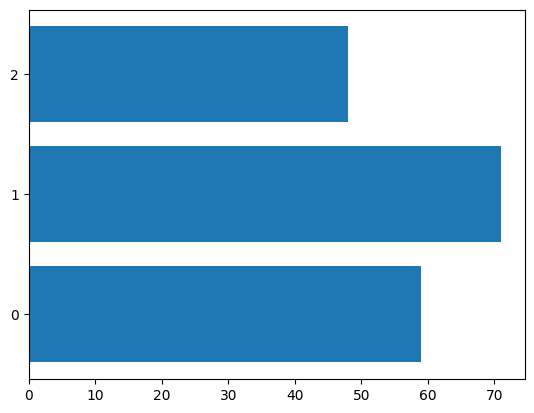

In [22]:
plt.barh(width=targets.values, y=targets.index);

* 단일 변수 분포(연속형) 확인 - 히스토그램

```sns.histplot(data=데이터프레임, x=컬럼, y=컬럼, bins=구간개수)```

    plt.hist(컬럼, bins=구간개수, range=(min, max)=> x의 범위, data=데이터프레임)

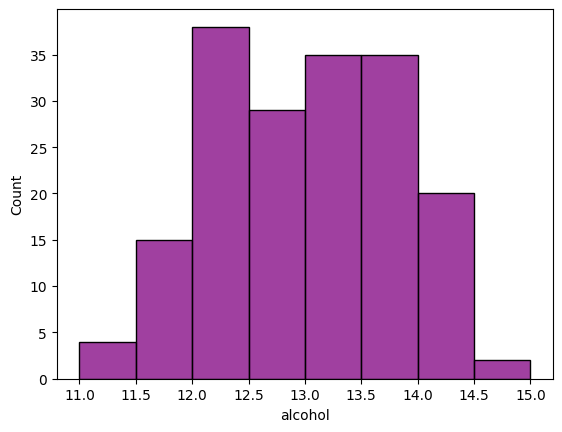

In [30]:
sns.histplot(wine, x='alcohol', bins=8, binrange=(11, 15), color='purple');

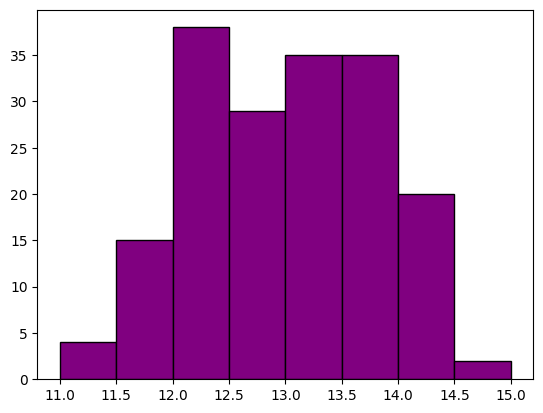

In [29]:
plt.hist(x='alcohol', data=wine, bins=8, range=(11,15), color='purple', edgecolor='black');

* 단일 변수 분포(연속형) 확인 - Box Plot (이상치 확인!)

```df[[컬럼1, 컬럼2]].boxplot(by=컬럼)```

    sns.boxplot(x=컬럼, y=컬럼, data=데이터프레임)

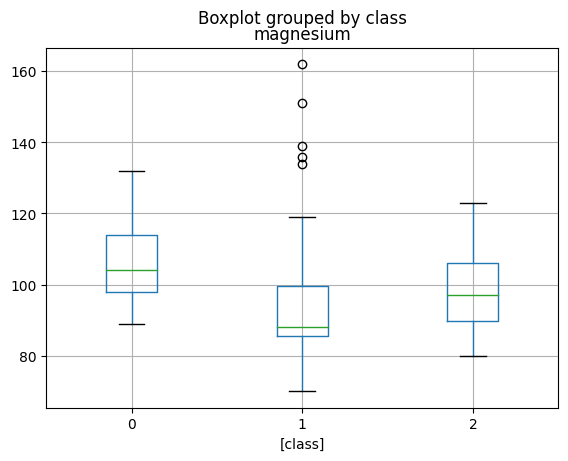

In [38]:
wine[['class', 'magnesium']].boxplot(by='class');

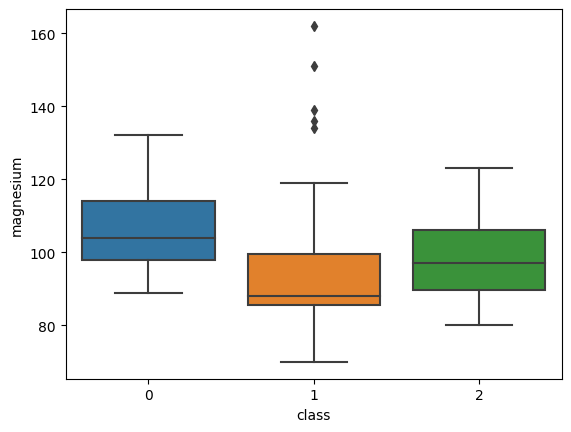

In [39]:
sns.boxplot(x='class', y='magnesium', data=wine);

* 두 변수의 관계와 분포 확인 - 산점도

```plt.scatter(x=Series, y=Series, alpha=투명도, marker=마커형태)```

    sns.scatterplot(x=컬럼, y=컬럼, data=데이터프레임, hue=분류기준, marker=마커형태, s=마커 사이즈)

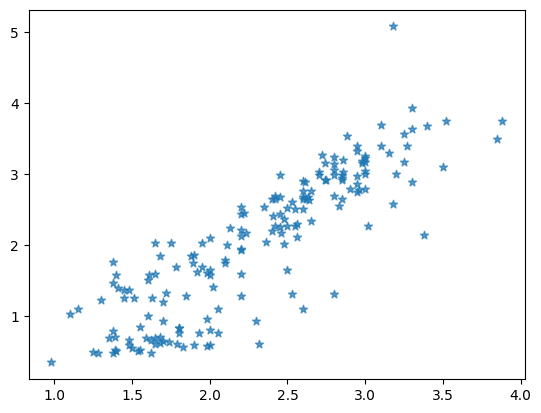

In [50]:
plt.scatter(x=wine['total_phenols'], y=wine['flavanoids'], alpha=.7, marker='*');

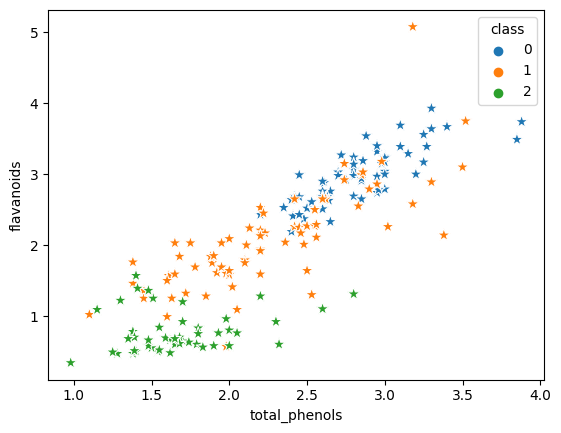

In [64]:
sns.scatterplot(x='total_phenols', y='flavanoids', data=wine, hue='class', marker='*', s=100);

* 회귀선 그래프